In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import scipy.io as sc 
import scipy.signal as signal
from sympy import symbols, pprint
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from structureSelector import *
from methods.utils.utilities import *
import plotly.express as px

def metrics(y, yest):
    residuo1 = y - yest
    mape = round(np.mean(np.abs(residuo1 / (yest + np.finfo(np.float64).eps))), 5)
    print('RMSE:', np.sqrt(np.mean(np.square(residuo1))), 'MSE:', np.mean(np.square(residuo1)), '\nAET:', np.sum(np.abs(residuo1)), '\nMAPE:', str(mape) + '%')
    cc = np.corrcoef(y, yest)
    #print("Correlation pearson:", np.mean(cc))

def integrate(p, ts=0.1):
    r = np.zeros(p.shape)
    r[0] = p[0] * ts
    for i in range(1, p.shape[0]):
        r[i] = r[i-1] + p[i] * ts
    return r

def derivate(p, ts=0.1):
    r = np.zeros(p.shape)
    r[1:] = (p[1:] - p[:-1]) / ts
    return r

ballbeam  = np.loadtxt('../data/ballbeam.dat')
print(ballbeam.shape)
part = 500#ballbeam.shape[0] // 2#700

u = ballbeam[:part, 0].reshape((1,-1))
y = ballbeam[:part, 1].reshape((1,-1))

wn = 0.1
b1, a1 = signal.butter(4, wn, 'low')

filtered = signal.filtfilt(b1, a1, y, padlen=100)

dy = np.zeros(filtered.shape)
dy[:, 1:] = (filtered[0, 1:] - filtered[0, :-1]) / 0.1

t = np.arange(0, part/10, 0.1)

fig=px.line(x=t, y=y[0].T, height=400, width=1300)
fig.add_scatter(x=t, y=filtered[0].T ,mode='lines')
fig.show()

wn = 0.2
b1, a1 = signal.butter(4, wn, 'low')
ufiltered = signal.filtfilt(b1, a1, u, padlen=100)
ufiltered[0, :15] = 0
U = integrate(ufiltered.T).T

fig=px.line(x=t, y=u[0].T, height=400, width=1300)
fig.add_scatter(x=t, y=ufiltered[0].T, mode='lines')
fig.add_scatter(x=t, y=U[0].T, mode='lines')
fig.show()

(1000, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

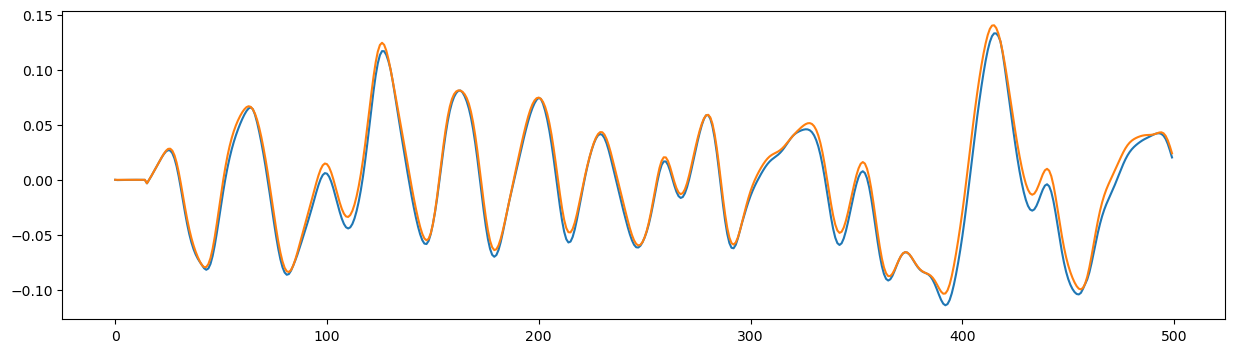

In [2]:
J = 4.948e-6
R = 0.0132
m = 0.071
g = 9.81
r = 0.0118
h = 0.035
fb = 0.0362
vt = 0.008
a0 = -0.16
Ff = fb * m * g * np.cos(u) * dy * np.tanh(dy / vt)
s2 = (np.sin(ufiltered)*m*g - Ff) / (m + J/(R**2))
plt.figure(figsize=(15,4))
plt.plot(s2.T)
plt.plot(ufiltered.T*7)
plt.show

(1, 500) (1, 500)


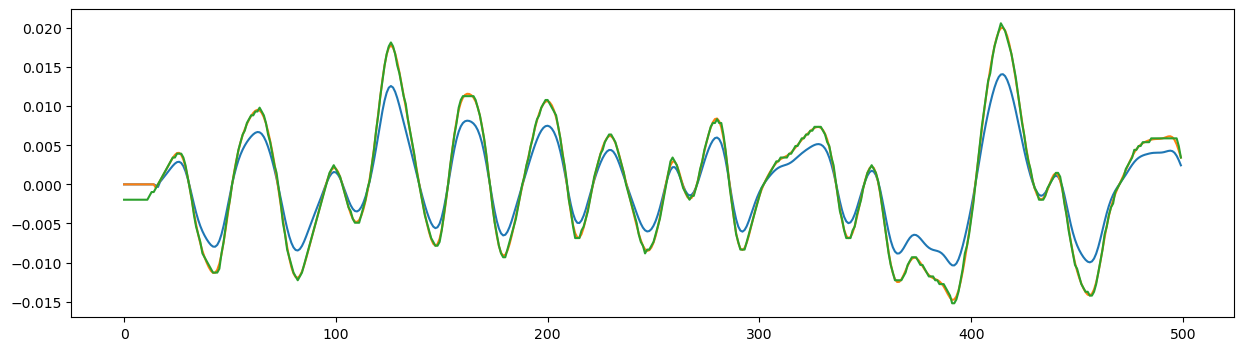

In [3]:
du = derivate(ufiltered.T).T
d2u = derivate(du.T).T
print(du.shape, d2u.shape)

ss = m*(h+r)*d2u + (J/r)*d2u - m*g*np.sin(ufiltered) - m*y*(du**2)
plt.figure(figsize=(15,4))
plt.plot(-ss.T)
plt.plot(ufiltered.T)
plt.plot(u.T)

plt.show()

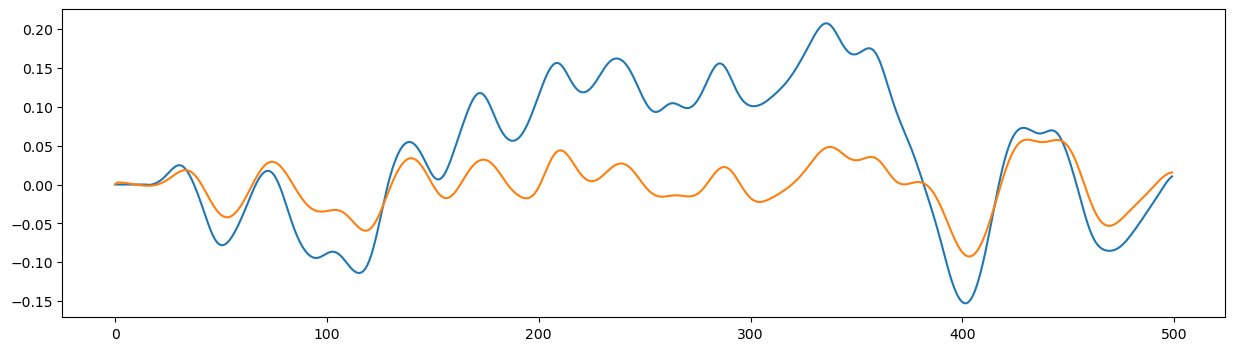

In [4]:
it = integrate(-ss.T)
plt.figure(figsize=(15,4))
plt.plot(it/0.1)
plt.plot(dy.T)
plt.show()

In [5]:
fig=px.line(x=t, y=dy[0].T, height=400, width=1300)
fig.add_scatter(x=t, y=U[0].T * 5, mode='lines')
fig.show()

In [6]:
d2y = derivate(dy.T).T
d3y = derivate(d2y.T).T

fig=px.line(x=t, y=u[0].T*5, height=400, width=1300)
fig.add_scatter(x=t, y=d2y[0].T , mode='lines')
fig.show()
fig=px.line(x=t, y=du[0].T*5, height=400, width=1300)
fig.add_scatter(x=t, y=d3y[0].T , mode='lines')
fig.show()

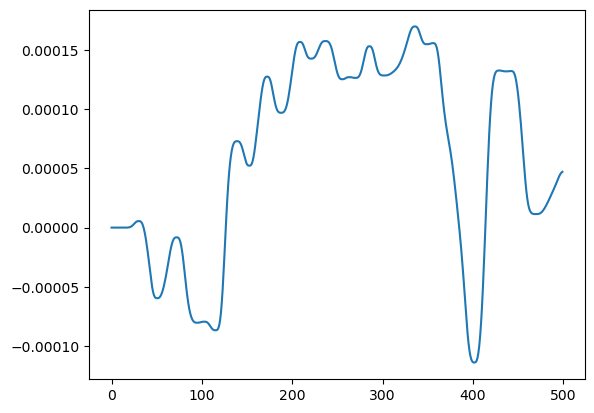

In [7]:
aa = np.sign(ufiltered) * (1 - np.cos(ufiltered - 0.000))
th = np.tanh(du/0.11)
fig=px.line(x=t, y=d3y[0].T, height=400, width=1300)
fig.add_scatter(x=t, y=du[0].T * 5, mode='lines')
fig.add_scatter(x=t, y=th[0].T/5, mode='lines')
fig.show()
'''fig=px.line(x=t, y=du[0].T*5, height=400, width=1300)
fig.add_scatter(x=t, y=d3y[0].T , mode='lines')
fig.show()'''
plt.plot(integrate(aa.T))

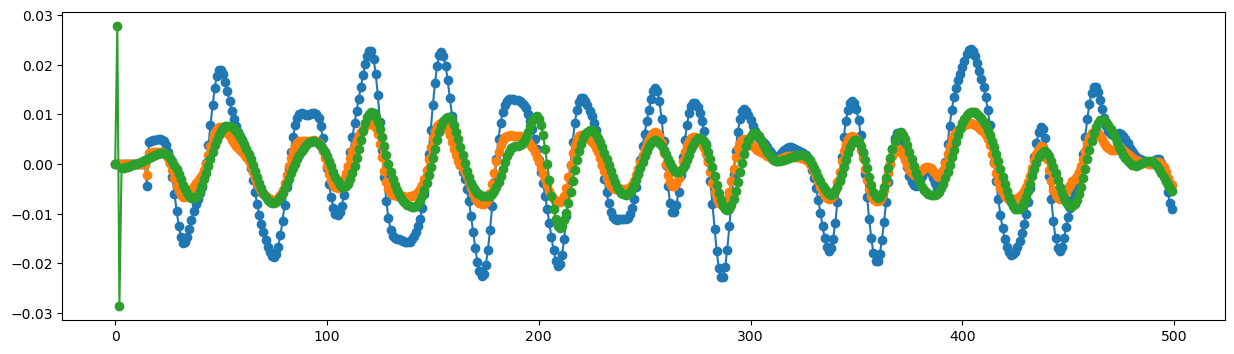

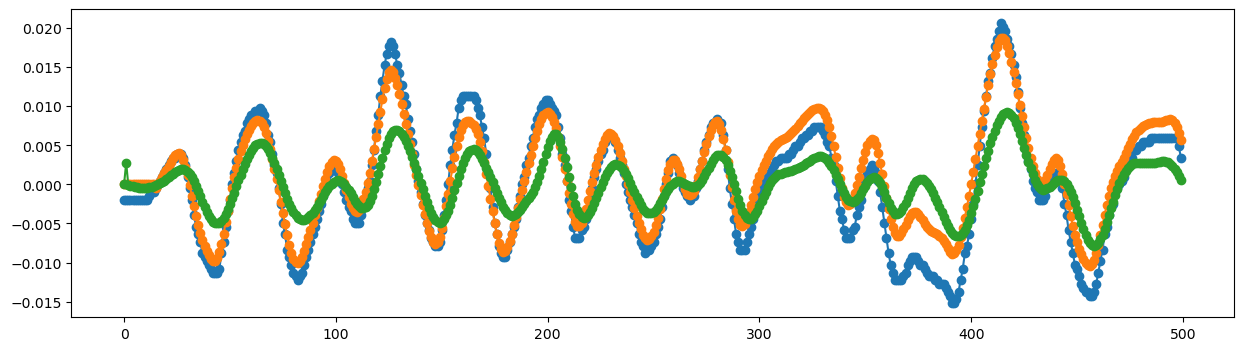

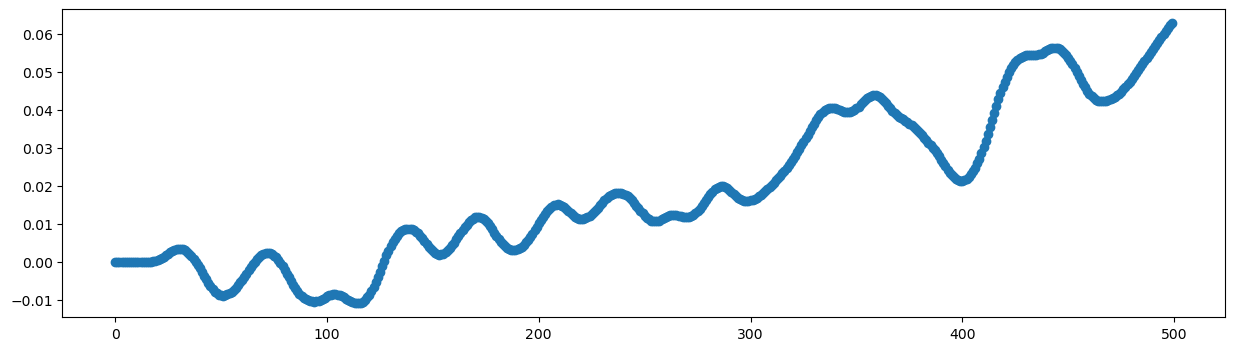

In [40]:
th = np.tanh(du / 0.02)
iy = integrate(th.T / 50).T
ii = integrate(iy.T).T
plt.figure(figsize=(15,4))
plt.plot(du.T, '-o')
plt.plot(th.T / 100, '-o')
plt.plot(d3y.T / 10, '-o')
plt.show()
plt.figure(figsize=(15,4))
plt.plot(u.T, '-o')
plt.plot(iy.T, '-o')
plt.plot(d2y.T / 10, '-o')
plt.show()
plt.figure(figsize=(15,4))
#plt.plot(u.T, '-o')
plt.plot(ii.T, '-o')
plt.show()